In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# GET THE DATA

In [3]:
df= pd.read_csv(r'C:\Users\ashwi\Downloads\IPL Points table.csv')

# READ THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        126 non-null    int64  
 1   Team short  126 non-null    object 
 2   Pld         126 non-null    int64  
 3   Won         126 non-null    int64  
 4   Lost        126 non-null    int64  
 5   Net RR      126 non-null    float64
 6   Pts         126 non-null    int64  
 7   Position    126 non-null    int64  
 8   Trophies    126 non-null    int64  
 9   Team        126 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 10.0+ KB


In [5]:
df

,Year,Team short,Pld,Won,Lost,Net RR,Pts,Position,Trophies,Team
0,2008,RR,14,11,3,0.632,22,1,1,Rajasthan Royals
1,2008,KXIP,14,10,4,0.509,20,2,0,Kings XI Punjab
2,2008,CSK,14,8,6,-0.192,16,3,0,Chennai Super Kings
3,2008,DC,14,7,6,0.342,15,4,0,Deccan Chargers
4,2008,MI,14,7,7,0.570,14,5,0,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...
121,2022,DC,14,7,7,2.040,14,6,0,Delhi Capitals
122,2022,KKR,14,6,8,0.146,12,7,0,Kolkata Knight Riders
123,2022,SRH,14,6,8,-0.379,12,8,0,Sunrisers Hyderabad
124,2022,CSK,14,4,10,-0.203,8,9,0,Chennai Super Kings


# DATA MANIPULATION


In [6]:
a=df.groupby('Pld').max()
a

,Year,Team short,Won,Lost,Net RR,Pts,Position,Trophies,Team
Pld,,,,,,,,,
14,2022,SRH,11,12,2.040,22,10,1,Sunrisers Hyderabad
16,2013,SRH,11,13,0.617,22,9,1,Sunrisers Hyderabad


In [7]:
# Create a new column to check match total
df["Won+Lost"] = df["Won"] + df["Lost"]

# Compare with 'Pld'
df["Mismatch"] = df["Pld"] != df["Won+Lost"]

# Filter the rows with mismatch
mismatched_rows = df[df["Mismatch"]]
print(mismatched_rows)


    Year Team short  Pld  Won  Lost  Net RR  Pts  Position  Trophies  \
3   2008         DC   14    7     6   0.342   15         4         0   
5   2008        KKR   14    6     7  -0.147   13         6         0   
9   2009        CSK   14    8     5   0.951   17         2         0   
13  2009         RR   14    6     7  -0.352   13         6         0   
14  2009         MI   14    5     8   0.297   11         7         0   
15  2009        KKR   14    3    10  -0.789    7         8         0   
24  2011        RCB   14    9     4   0.326   19         1         0   
29  2011         RR   14    6     7  -0.691   13         6         0   
32  2011         DC   14    4     9  -0.448    9         9         0   
33  2011        PWI   14    4     9  -0.134    9        10         0   
35  2012        KKR   16   10     5   0.561   21         2         1   
37  2012        CSK   16    8     7   0.100   17         4         0   
38  2012        RCB   16    8     7  -0.022   17         5      

In [8]:
df["Pld"] = df["Won"] + df["Lost"]


In [9]:
df

,Year,Team short,Pld,Won,Lost,Net RR,Pts,Position,Trophies,Team,Won+Lost,Mismatch
0,2008,RR,14,11,3,0.632,22,1,1,Rajasthan Royals,14,False
1,2008,KXIP,14,10,4,0.509,20,2,0,Kings XI Punjab,14,False
2,2008,CSK,14,8,6,-0.192,16,3,0,Chennai Super Kings,14,False
3,2008,DC,13,7,6,0.342,15,4,0,Deccan Chargers,13,True
4,2008,MI,14,7,7,0.570,14,5,0,Mumbai Indians,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022,DC,14,7,7,2.040,14,6,0,Delhi Capitals,14,False
122,2022,KKR,14,6,8,0.146,12,7,0,Kolkata Knight Riders,14,False
123,2022,SRH,14,6,8,-0.379,12,8,0,Sunrisers Hyderabad,14,False
124,2022,CSK,14,4,10,-0.203,8,9,0,Chennai Super Kings,14,False


In [10]:
a=df.groupby('Team')
b=a.agg({'Pts':'mean'})
b

,Pts
Team,
Chennai Super Kings,16.461538
Deccan Chargers,16.000000
Delhi Capitals,17.000000
Delhi Daredevils,9.500000
Gujarat Lions,13.000000
Gujarat Titans,20.000000
Kings XI Punjab,13.384615
Kochi Tuskers Kerala,12.000000
Kolkata Knight Riders,14.400000


In [11]:
team_rename = {
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Daredevils": "Delhi Capitals",
    "Gujarat Lions": "Gujarat Titans",
    "Kings XI Punjab": "Punjab Kings",
    "Pune Warriors": "Rising Pune Supergiants"
    # Kochi stays as it  is
}

# Apply renaming
# df["T"] = df["Team"].replace(team_rename)
df["Original Team"] = df["Team"]
df["Team"] = df["Team"].replace(team_rename)


In [12]:
df

,Year,Team short,Pld,Won,Lost,Net RR,Pts,Position,Trophies,Team,Won+Lost,Mismatch,Original Team
0,2008,RR,14,11,3,0.632,22,1,1,Rajasthan Royals,14,False,Rajasthan Royals
1,2008,KXIP,14,10,4,0.509,20,2,0,Punjab Kings,14,False,Kings XI Punjab
2,2008,CSK,14,8,6,-0.192,16,3,0,Chennai Super Kings,14,False,Chennai Super Kings
3,2008,DC,13,7,6,0.342,15,4,0,Sunrisers Hyderabad,13,True,Deccan Chargers
4,2008,MI,14,7,7,0.570,14,5,0,Mumbai Indians,14,False,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022,DC,14,7,7,2.040,14,6,0,Delhi Capitals,14,False,Delhi Capitals
122,2022,KKR,14,6,8,0.146,12,7,0,Kolkata Knight Riders,14,False,Kolkata Knight Riders
123,2022,SRH,14,6,8,-0.379,12,8,0,Sunrisers Hyderabad,14,False,Sunrisers Hyderabad
124,2022,CSK,14,4,10,-0.203,8,9,0,Chennai Super Kings,14,False,Chennai Super Kings


# DATA ANALYSIS

In [13]:
a=df.groupby('Team')
b=a.agg({'Pts':'mean','Net RR':'mean'})
b

,Pts,Net RR
Team,,
Chennai Super Kings,16.461538,0.260077
Delhi Capitals,12.500000,-0.051200
Gujarat Titans,15.333333,-0.251467
Kochi Tuskers Kerala,12.000000,-0.214000
Kolkata Knight Riders,14.400000,0.101133
Lucknow Super Giants,18.000000,0.251000
Mumbai Indians,15.933333,0.298467
Punjab Kings,13.333333,-0.160400
Rajasthan Royals,14.538462,-0.193169


High Points + Positive NRR = Reliable top performer (e.g., CSK, MI, LSG)

High Points + Negative NRR = Close-match winners; might be riskier bets (e.g., Gujarat Titans)

Low Points + Negative NRR = Poor performance; likely to struggle (e.g., Rising Pune Supergiants)



Mumbai Indians (MI) should include all data from their existence (2008 to present).

Rising Pune Supergiants (RPS) should only have data for the years 2016 and 2017.

In [14]:
# Renaming the old name with currents name for further clarification
df["Team"] = df["Team"].replace({
    "Deccan Chargers": "Sunrisers Hyderabad",
    "Delhi Daredevils": "Delhi Capitals",
    "Gujarat Lions": "Gujarat Titans",
    "Kings XI Punjab": "Punjab Kings",
    "Pune Warriors": "Rising Pune Supergiants"
})


In [15]:
print(df["Team"].unique())


['Rajasthan Royals' 'Punjab Kings' 'Chennai Super Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Kochi Tuskers Kerala'
 'Rising Pune Supergiants' 'Delhi Capitals' 'Gujarat Titans'
 'Lucknow Super Giants']


In [16]:
# Filter rows where team is Rising Pune Supergiants 
rps_data = df[df["Team"] == "Rising Pune Supergiants"]
rps_data


,Year,Team short,Pld,Won,Lost,Net RR,Pts,Position,Trophies,Team,Won+Lost,Mismatch,Original Team
33,2011,PWI,13,4,9,-0.134,9,10,0,Rising Pune Supergiants,13,True,Pune Warriors
42,2012,PWI,16,4,12,-0.551,8,9,0,Rising Pune Supergiants,16,False,Pune Warriors
50,2013,PWI,16,4,12,-1.006,8,8,0,Rising Pune Supergiants,16,False,Pune Warriors
74,2016,RSP,14,5,9,0.015,10,7,0,Rising Pune Supergiants,14,False,Rising Pune Supergiants
77,2017,RSP,14,9,5,0.176,18,2,0,Rising Pune Supergiants,14,False,Rising Pune Supergiants


>>While this analysis gives a clear picture of historical performance, predicting the next IPL winner accurately isn’t feasible due to the limited scope of data 

>>Past performance trends (points, NRR, trophies) can suggest which teams are consistently strong, but they don’t guarantee future success — cricket is highly dynamic and outcome depends on real-time events

In [17]:
grp_team = df.groupby('Team').agg({'Trophies': 'sum','Pts': 'sum','Net RR': 'sum'})
grp_team_sorted = grp_team.sort_values(by='Trophies', ascending=False)
grp_team_sorted


,Trophies,Pts,Net RR
Team,,,
Mumbai Indians,5,239,4.4770
Chennai Super Kings,4,214,3.3810
Kolkata Knight Riders,2,216,1.5170
Sunrisers Hyderabad,2,276,0.7490
Gujarat Titans,1,46,-0.7544
Rajasthan Royals,1,189,-2.5112
Kochi Tuskers Kerala,0,12,-0.2140
Delhi Capitals,0,125,-0.5120
Punjab Kings,0,200,-2.4060


Mumbai Indians are the best overall – most trophies (5), highest points, and best run rate.

Chennai Super Kings are close behind with 4 trophies and strong consistency.

KKR and SRH also have multiple trophies, but SRH has the highest matches (more points, lower efficiency).

RCB and Punjab Kings have high points but no trophies – underperformers in big games.

Gujarat Titans got a trophy fast but often win narrowly (negative run rate).

Lucknow is new but promising (positive run rate).

Negative Net RR often means more losses or big defeats

In [18]:
grp_team = df.groupby('Team').agg({'Pld': 'sum','Won': 'sum','Trophies': 'sum'})
grp_team_sorted = grp_team.sort_values(by='Won', ascending=False)
grp_team_sorted

,Pld,Won,Trophies
Team,,,
Sunrisers Hyderabad,282,136,2
Mumbai Indians,213,119,5
Chennai Super Kings,184,106,4
Kolkata Knight Riders,210,106,2
Royal Challengers Bangalore,208,103,0
Punjab Kings,214,100,0
Rajasthan Royals,181,92,1
Delhi Capitals,141,62,0
Rising Pune Supergiants,73,26,0


Sunrisers Hyderabad has played the most matches (282), likely due to being combined with past iterations like Deccan Chargers, indicating a long and evolving presence in the IPL.

Mumbai Indians (MI) has the highest win count (119 wins) and also leads in trophies with 5, showing consistent top-tier performance.

Chennai Super Kings (CSK) follows closely with 106 wins and 4 trophies, maintaining efficiency with fewer matches (184).

Royal Challengers Bangalore (RCB) and Punjab Kings have won over 100 and 100 matches respectively but have never won a trophy, suggesting underperformance in playoffs or finals.

Kolkata Knight Riders (KKR) has matched CSK in wins (106) with a similar number of matches and has secured 2 trophies, indicating solid overall performance.

Gujarat Titans, a recent entrant, already has a trophy with just 23 wins in 42 matches—a very high success rate.

Lucknow Super Giants and Kochi Tuskers Kerala are either too new or defunct, with limited match data and no trophies yet

Rajasthan Royals and Delhi Capitals have moderate win counts and only 1 or no trophies.

# DATA VISUALIZATION

In [19]:
df

,Year,Team short,Pld,Won,Lost,Net RR,Pts,Position,Trophies,Team,Won+Lost,Mismatch,Original Team
0,2008,RR,14,11,3,0.632,22,1,1,Rajasthan Royals,14,False,Rajasthan Royals
1,2008,KXIP,14,10,4,0.509,20,2,0,Punjab Kings,14,False,Kings XI Punjab
2,2008,CSK,14,8,6,-0.192,16,3,0,Chennai Super Kings,14,False,Chennai Super Kings
3,2008,DC,13,7,6,0.342,15,4,0,Sunrisers Hyderabad,13,True,Deccan Chargers
4,2008,MI,14,7,7,0.570,14,5,0,Mumbai Indians,14,False,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2022,DC,14,7,7,2.040,14,6,0,Delhi Capitals,14,False,Delhi Capitals
122,2022,KKR,14,6,8,0.146,12,7,0,Kolkata Knight Riders,14,False,Kolkata Knight Riders
123,2022,SRH,14,6,8,-0.379,12,8,0,Sunrisers Hyderabad,14,False,Sunrisers Hyderabad
124,2022,CSK,14,4,10,-0.203,8,9,0,Chennai Super Kings,14,False,Chennai Super Kings


C:\Users\ashwi\AppData\Local\Temp\ipykernel_19996\4056920497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trophy_data.values, y=trophy_data.index, palette='viridis')


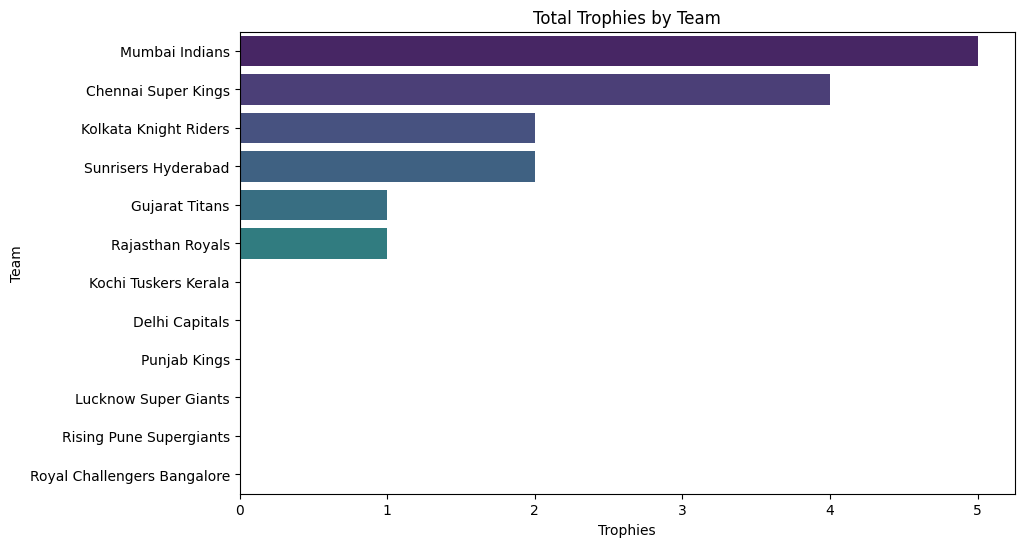

In [20]:
trophy_data = df.groupby('Team')['Trophies'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=trophy_data.values, y=trophy_data.index, palette='viridis')
plt.title('Total Trophies by Team')
plt.xlabel('Trophies')
plt.ylabel('Team')
plt.show()


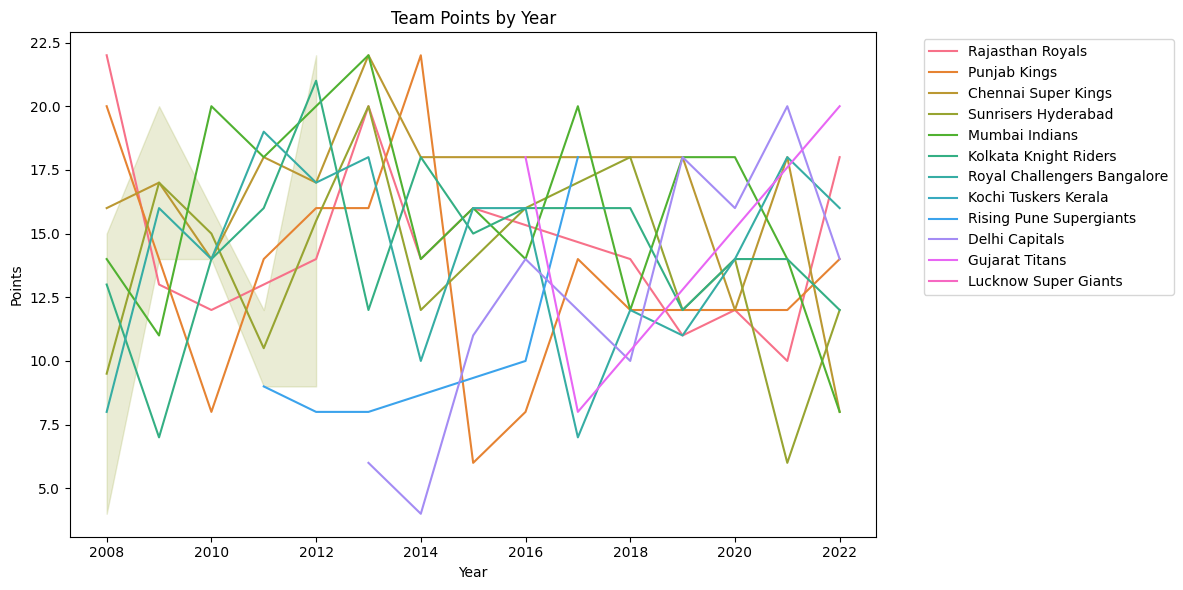

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Pts', hue='Team')
plt.title('Team Points by Year')
plt.xlabel('Year')
plt.ylabel('Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


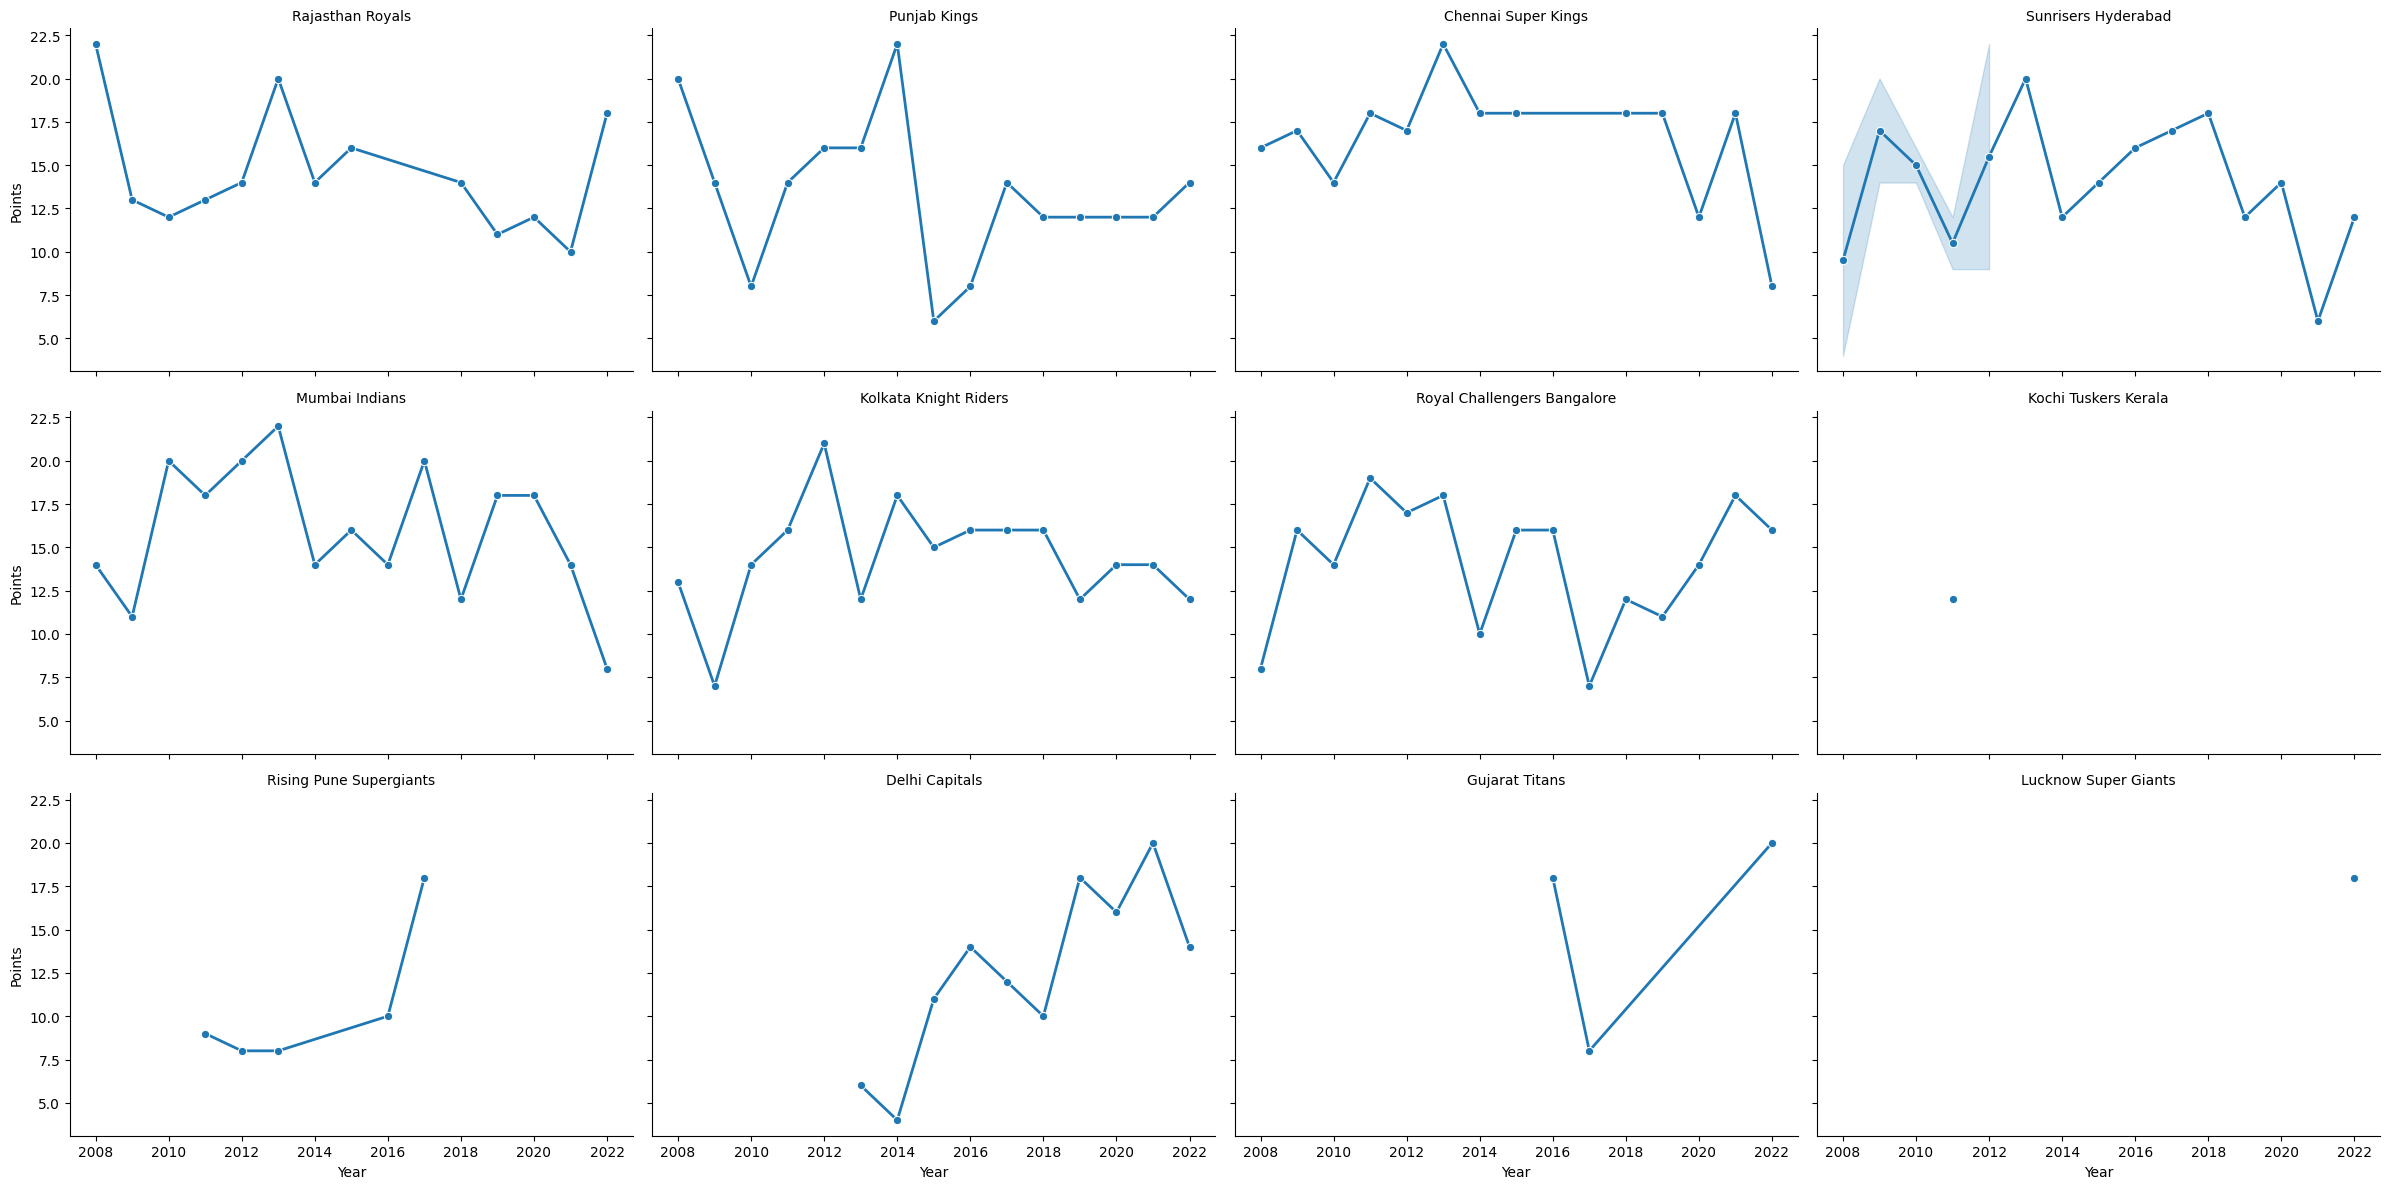

In [22]:
g= sns.FacetGrid(df, col="Team", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot,"Year", "Pts", marker="o", linewidth=2)

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Points")
g.tight_layout()
plt.show()


C:\Users\ashwi\AppData\Local\Temp\ipykernel_19996\2065548624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nrr_data.values, y=nrr_data.index, palette='coolwarm')


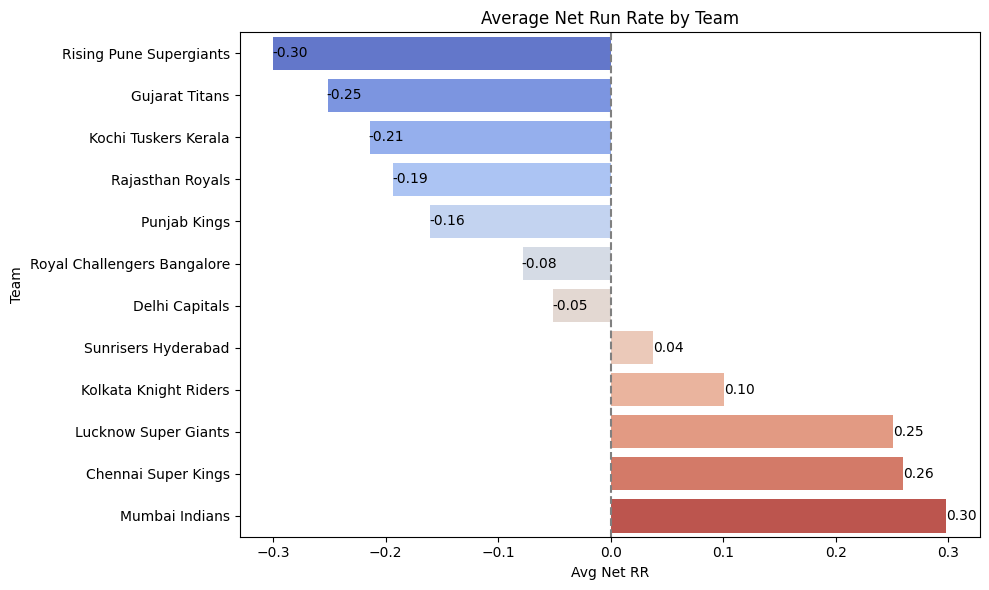

In [40]:
nrr_data = df.groupby('Team')['Net RR'].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=nrr_data.values, y=nrr_data.index, palette='coolwarm')
plt.title('Average Net Run Rate by Team')
plt.xlabel('Avg Net RR')
plt.ylabel('Team')
plt.axvline(0, color='gray', linestyle='--')  

for index, value in enumerate(nrr_data.values):
    plt.text(value + 0.00009 if value >= 0 else value - 0.001, index, f"{value:.2f}", va='center',)

plt.tight_layout()
plt.show()



>>Mumbai Indians stand out as the most successful team with 5 trophies, highest points, and strong positive Net Run Rate (NRR) — a benchmark of consistent excellence.

>>Chennai Super Kings closely follow with 4 trophies and a stable performance across seasons, making them one of the most reliable teams.

>>Kolkata Knight Riders and Sunrisers Hyderabad have also won multiple trophies, but their overall performance has been less consistent in recent years.

>>Teams like Royal Challengers Bangalore and Punjab Kings have high match participation and points but no trophies, suggesting strong league performance but struggles in playoffs.

>>New teams like Gujarat Titans and Lucknow Super Giants have shown promising starts — Gujarat even clinching a trophy early on.

>>Rising Pune Supergiants, Kochi Tuskers Kerala, and other short-lived teams showed mixed performances and had minimal impact long-term.

>>Teams with positive average NRR (like Mumbai, Chennai, and Lucknow) generally performed better over time, indicating not just wins, but dominant wins.

# Success in the IPL is a balance of winning consistently, performing under pressure, and maintaining a healthy Net Run Rate. While trophies define greatness, consistent point accumulation and NRR reveal depth and stability.